In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def run_experiment(n_prisoners, verbose = False):
    total_days = 1
    day = 1
    days = []
    it_prisoner = 1
    light = 0
    while it_prisoner < n_prisoners:
        selected_prisoner = random.randint(1,n_prisoners)
        #print(f"day {day}: light={light}, selected_prisoner={selected_prisoner}, it_prisoner = {it_prisoner} (total = {total_days})")
        if selected_prisoner == day:
            #print(f"it's prisoner {selected_prisoner}'s day!")
            if selected_prisoner == it_prisoner:
                if light == 0:
                    light = 1
                    if verbose: print(f"day {total_days}, prisoner {selected_prisoner} is it and they switch on the light")
                
            if selected_prisoner != it_prisoner:
                if light == 1:
                    light = 0
                    it_prisoner = selected_prisoner
                    if verbose: print(f"day {total_days}, prisoner {selected_prisoner} sees the light on! They are now it, they switch the light off")

        if selected_prisoner != day:
            if light == 1:
                light = 0
                if verbose: print(f"day {total_days}, prisoner {selected_prisoner} switches the light off")
        #print(f"day {day}: light={light}, selected_prisoner={selected_prisoner}, it_prisoner = {it_prisoner} (total = {total_days})")
        day += 1 
        total_days += 1
        if day == n_prisoners + 1:
            day = 1
    if verbose: print(f"prisoner {n_prisoners} tells the warden everyone has been in the room")
    return total_days


In [ ]:
def compute_stats(n_prisoners, runs):
    days = []
    for run in range(runs):
        days.append(run_experiment(n_prisoners))
    return np.average(days), np.std(days)

In [38]:
n_pris = np.arange(2,10)
stats = [compute_stats(n,1000) for n in n_pris]

<ErrorbarContainer object of 3 artists>

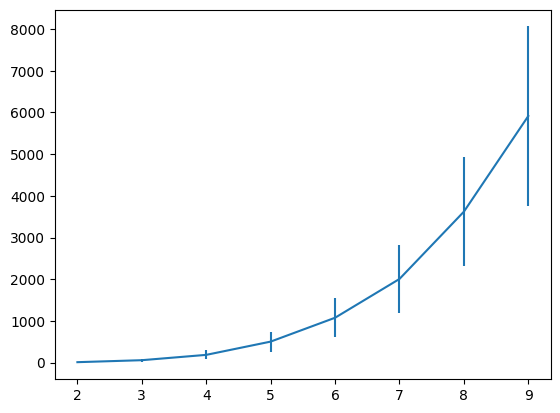

In [39]:
avgs = [stats[_][0] for _ in range(len(stats))]
stds = [stats[_][1] for _ in range(len(stats))]
plt.errorbar(n_pris, avgs, stds)